# SAE sur les graphes : définition de plannings à l'aide de la coloration de sommets ou d'arêtes

Dans cette SAE sur les graphes, l'objectif est de pouvoir faire de la coloration de graphe, en utilisant l'algorithme de Welsh et Powell. La coloration de graphes sera utilisée pour établir des plannings, pour différentes applications.

La représentation choisie pour les graphes non-orientés est une matrice d'adjacence, qui sera représentée par un tableau de tableau (les noms des sommets sont des entiers et seront numérotés en commençant à 0). Nous considérons que le nombre de sommets du graphe ne pourra pas être modifié une fois le graphe construit. Un tableau contenant le nom associé à chaque sommet sera également créé.


## Utilisation de graphviz pour visualiser les graphes

#### Installation de graphviz pour pouvoir visualiser les graphes

In [116]:
import graphviz
graphviz.__version__, graphviz.version()

('0.20.1', (8, 0, 5))

#### Création d'une fonction de conversion d'un graphe, défini par une matrice d'adjacence, vers le format graphviz

In [117]:
def creation_graphe_graphviz(g):
    # création d'un graphe non orienté
    dot = graphviz.Graph()
    
    # ajout des sommets
    for i in range(len(g)):
        dot.node(str(i))
    
    # ajout des arêtes
    for i in range(len(g)):
        for j in range(i):
            if g[i][j] == 1:
                dot.edge(str(i), str(j))
    
    return dot

## Graphes non orientés

### Définition des fonctions utiles

#### Fonction qui construit un graphe vide (sans aretes), avec le nombre de sommets donné, et qui retourne la matrice d'adjacence correspondante

In [118]:
def graphe_vide(n):
    g = []
    for i in range(n):
        l = []
        for j in range(n):
            l.append(0)
        g.append(l)
    return g

#### Fonction qui donne le nombre de sommets du graphe

In [119]:
def nb_sommet(graphe):
    return len(graphe)

#### Fonction qui retourne vrai si l'arete, dont les numéros de sommets extrémités sont donnés, existe

In [120]:
def est_arete(g, i, j):
    return g[i][j] == 1

#### Fonction qui calcule le nombre d'arêtes du graphe

In [121]:
def nb_aretes(graphe):
    nb = 0
    
    # à compléter
    for i in graphe:
        for j in i:
            if j==1:
                nb+=1
    return nb/2

#### Fonction qui calcule le degré d'un sommet

In [122]:
def degre(g, i):
    nb=0
    for e in range(len(g)):
        if e==i: #c'est l'sommet
            for v in g[e]:
                if v==1:
                    nb+=1
    return nb

### Quelques tests des fonctions

#### Définition d'un premier graphe

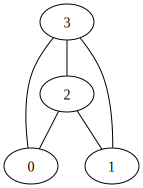

In [123]:
graphe1 = [[0,0,1,1],
          [0,0,1,1],
          [1,1,0,1],
          [1,1,1,0]]

noms_sommets_graphe1 = {0:"Maths", 1:"Informatique", 2:"Anglais", 3:"Gestion"}

gdot1 = creation_graphe_graphviz(graphe1)
#print(gdot1.source)
gdot1

#### Définition d'un second graphe

2


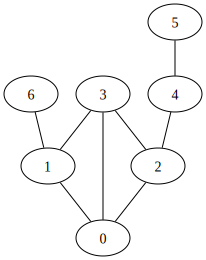

In [124]:
graphe2 = [[0,1,1,1,0,0,0],
           [1,0,0,1,0,0,1],
           [1,0,0,1,1,0,0],
           [1,1,1,0,0,0,0],
           [0,0,1,0,0,1,0],
           [0,0,0,0,1,0,0],
           [0,1,0,0,0,0,0]]

noms_sommets_graphe2 = {0:"Thomas",1:"Anne",2:"Romain",3:"Delphine",4:"Lucas",5:"Marie",6:"Tom"}

gdot2 = creation_graphe_graphviz(graphe2)

print(degre(graphe2,4))

#print(gdot2.source)
gdot2


## Coloration des sommets d'un graphe, sous la forme d'un dictionnaire, en utilisant l'algorithme de Welsh-Powell

### Fonction principale, pour la coloration de sommets

#### Fonction qui trie les sommets selon leur degré décroissant et qui retourne la liste des sommets ainsi triée

In [125]:
def tri_sommets(g):
    sommets_tries = []
    degres_tries = []
    for i in range(len(g)): #ajout nb degre
        degres_tries.append(degre(g,i))
        sommets_tries.append(i)
    
    for i in range(len(sommets_tries)):
        for j in range(len(sommets_tries)):
            if degres_tries[i]>degres_tries[j]:
               degres_tries[i],degres_tries[j]= degres_tries[j],degres_tries[i]
               sommets_tries[i],sommets_tries[j] = sommets_tries[j], sommets_tries[i]
            elif degres_tries[i]==degres_tries[j] and sommets_tries[i]<sommets_tries[j]:
               degres_tries[i],degres_tries[j]= degres_tries[j],degres_tries[i]
               sommets_tries[i],sommets_tries[j] = sommets_tries[j], sommets_tries[i]

    return sommets_tries,degres_tries

In [126]:
# test de la fonction tri_sommets
print("tri des sommets du graphe 1, selon leur degré décroissant")
print(tri_sommets(graphe2))

tri des sommets du graphe 1, selon leur degré décroissant
([0, 1, 2, 3, 4, 5, 6], [3, 3, 3, 3, 2, 1, 1])


#### Fonction qui fait la coloration de sommets avec l'algorithme de Welsh-Powell
Le dictionnaire, retourné par la fonction, associe un numéro de couleur (clé du dictionnaire) et la liste des sommets de cette couleur (valeur du dictionnaire).

In [127]:
def coloration_sommets_welsh_powell(graphe):
    
    couleurs = {"fuchsia":[],"aqua":[],"yellow":[],"blue":[],"red":[],"lime":[],"cyan":[],"grey":[],"darkorange":[],"burlywood":[],"purple":[],"darkgreen":[]}
    color_list=["fuchsia","aqua","yellow","blue","red","lime","cyan","grey","darkorange","purple","burlywood","darkgreen"]
    
    ordre_sommet = tri_sommets(graphe)[0]

    for i in ordre_sommet:
        couleur_actuel=0
        for s in range(len(graphe[i])): #parcours sommets dans ordre
            if graphe[i][s]==1 and s in couleurs[color_list[couleur_actuel]]: # si le sommet voisin est coloré et est lié 1, on passe à la couleur suivante
                couleur_actuel+=1
            
        couleurs[color_list[couleur_actuel]].append(i)
    return couleurs

In [128]:
# test de la fonction coloration_sommets_welsh_powell
print("coloration des sommets du graphe")
print(coloration_sommets_welsh_powell(graphe2))


coloration des sommets du graphe
{'fuchsia': [0, 4, 6], 'aqua': [1, 2, 5], 'yellow': [3], 'blue': [], 'red': [], 'lime': [], 'cyan': [], 'grey': [], 'darkorange': [], 'burlywood': [], 'purple': [], 'darkgreen': []}


#### Fonction qui affiche la coloration des sommets d'un graphe

Reprenez la fonction `creation_graphe_graphviz(g)` et regardez le projet graphviz pour Python (https://pypi.org/project/graphviz/) pour afficher les couleurs des sommets sur le graphe (vous pouvez également regarder la page https://graphviz.org/doc/info/colors.html, pour avoir les noms de couleurs utilisables). 
Le graphe avec les sommets coloriés est obtenu à partir de `graphe`, le graphe de départ, et de `coloration`, le dictionnaire contenant la coloration des sommets (obtenu en résultat de la fonction `coloration_sommets_welsh_powell(graphe)`).

In [129]:
def affichage_couleurs_sommets_graphviz(graphe, coloration):
    # création d'un graphe non orienté, avec des sommets coloriés
    dot_col_som = graphviz.Graph()
    
    #remplir matrice
    dot_col_som=creation_graphe_graphviz(graphe)
    #coloration
    for couleur,sommets in coloration.items():
        for i in sommets:
            dot_col_som.node(str(i), style='filled', fillcolor=couleur)
    return dot_col_som

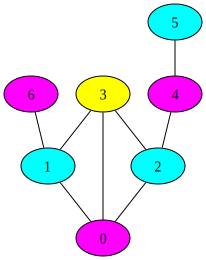

In [130]:
# test de la fonction affichage_couleurs_sommets_graphviz
#print(affichage_couleurs_sommets_graphviz(graphe1,coloration_sommets_welsh_powell(graphe1)))
affichage_couleurs_sommets_graphviz(graphe2,coloration_sommets_welsh_powell(graphe2))

### Fonctions intermédiaires, à compléter (vous pouvez en définir de nouvelles)

## Coloration des arêtes d'un graphes, sous la forme d'un dictionnaire, en utilisant l'algorithme de Welsh-Powell

### Fonctions intermédiaires, à compléter (vous pouvez en définir de nouvelles)

#### Fonction qui construit le graphe aux arêtes correspondant au graphe donné.
Les noms des sommets, dans le graphe aux arêtes, sont des tuples contenant les 2 numéros de sommets composant l'arête. La fonction retourne à la fois la matrice correspondant au graphe aux arêtes (variable `g_aretes`) et le dictionnaire donnant la correspondance entre chaque numéro de sommet dans le graphe aux arêtes et le nom de l'arête qu'il représente (variable `dict_aretes`).

In [131]:
def graphe_aux_aretes(graphe):
    nb_arr = 0
    g_aretes = graphe_vide(int(nb_aretes(graphe)))
    dict_aretes = {}
    #création dict_aretes
    for i in range(len(graphe)):
        for j in range(len(graphe[i])):
            if graphe[i][j] == 1:
                # check si arete pas déjà existante
                if [i,j] and [j,i] not in dict_aretes.values():
                    #effectue la création de l'arete
                    nb_arr += 1
                    nom_arr="e"+str(nb_arr)
                    dict_aretes[nom_arr] = [i,j]

#{ a : [5,2] } dico["a"]

    #creation graphe arete
    nb_arr = 0
    nb_autre_arr = 0
    for arete in dict_aretes.values():
        nb_arr += 1
        #regarde quel arete à les même sommets
        for autre_arete in dict_aretes.values():
            if nb_autre_arr<int(nb_aretes(graphe)): #si on est toujours dans la limite
                nb_autre_arr+=1
                if autre_arete!=arete: #si c'est pas la même
                    if arete[0] in autre_arete or arete[1] in autre_arete: #sommet en commun
                        g_aretes[nb_arr-1][nb_autre_arr-1]=1
                        g_aretes[nb_autre_arr-1][nb_arr-1]=1
            else:
                nb_autre_arr=0
    return (g_aretes, dict_aretes)

{'e1': [0, 2], 'e2': [0, 3], 'e3': [1, 2], 'e4': [1, 3], 'e5': [2, 3]}


[0, 1, 1, 0, 1]
[1, 0, 1, 1, 0]
[1, 1, 1, 0, 1]
[0, 1, 0, 0, 1]
[1, 0, 1, 1, 1]


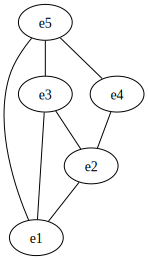

In [132]:
# test de la fonction graphe_aux_aretes
graphe_arr,dict_arr=graphe_aux_aretes(graphe1)
print(dict_arr)
print("\n")
for i in graphe_arr:
    print(i)


#creation custom de graphe (nom de sommet 0 -> e1)
got1_arr = graphviz.Graph()  
for i in range(len(graphe_arr)):
    got1_arr.node("e"+str((i+1)))
    
for i in range(len(graphe_arr)):
    for j in range(i):
        if graphe_arr[i][j] == 1:
            got1_arr.edge("e"+str((i+1)), "e"+str((j+1)))


#affichage du graphe
got1_arr

### Fonction principale, pour la coloration d'arêtes

#### Fonction qui fait la coloration d'arêtes, avec l'algorithme de Welsh-Powell

Le dictionnaire, retourné par la fonction, associe un numéro de couleur (clé du dictionnaire) et la liste des arêtes de cette couleur (valeur du dictionnaire). Une arête est définie par un tuple contenant les 2 numéros de sommets composant l'arête.

In [133]:
def coloration_aretes_welsh_powell(graphe):
    couleurs = {"fuchsia":[],"aqua":[],"yellow":[],"blue":[],"red":[],"lime":[],"cyan":[],"grey":[],"darkorange":[],"burlywood":[],"purple":[],"darkgreen":[]}

    graphe_arr,dict = graphe_aux_aretes(graphe)


    for arete_a_color in range(len(graphe_arr)): #on explore chaque arête
        arete_a_color_nom = "e"+str(arete_a_color+1)
        couleurs_potentiel=[]
        for arete_voisine in range(len(graphe_arr[arete_a_color])): #on explore leurs liens
            arete_voisine_nom = "e"+str(arete_voisine+1)
            if dict[arete_a_color_nom][0] in dict[arete_voisine_nom] or dict[arete_a_color_nom][1] in dict[arete_voisine_nom]: #si il y a un sommet identique pour les deux
                for couleur,membres in couleurs.items():
                    if arete_voisine_nom not in membres: #si la couleur n'est pas probable, on l'ajoute car l'arete voisine ne l'a pas
                        if couleur not in couleurs_potentiel:
                            couleurs_potentiel.append(couleur)
                    elif arete_voisine_nom in membres: #si la couleur est pas probable, on la retire car l'arete voisine l'a déjà
                        if couleur in couleurs_potentiel:
                            couleurs_potentiel.remove(couleur)
    
        for color in couleurs_potentiel: #on assigne l'arete a la premiere des couleurs potentiels
            couleurs[color].append(arete_a_color_nom)
            print(arete_a_color_nom,"est",color)
            break
    return couleurs

In [134]:
# test de la fonction coloration_aretes_welsh_powell
print(coloration_aretes_welsh_powell(graphe2))

e1 est fuchsia
e2 est aqua
e3 est yellow
e4 est aqua
e5 est yellow
e6 est fuchsia
e7 est yellow
e8 est fuchsia
{'fuchsia': ['e1', 'e6', 'e8'], 'aqua': ['e2', 'e4'], 'yellow': ['e3', 'e5', 'e7'], 'blue': [], 'red': [], 'lime': [], 'cyan': [], 'grey': [], 'darkorange': [], 'burlywood': [], 'purple': [], 'darkgreen': []}


#### Fonction qui affiche la coloration des arêtes d'un graphe

Reprenez la fonction `creation_graphe_graphviz(g)` et regardez le projet graphviz pour Python (https://pypi.org/project/graphviz/) pour afficher les couleurs des arêtes sur le graphe (vous pouvez également regarder la page https://graphviz.org/doc/info/colors.html, pour avoir les noms de couleurs utilisables). 
Le graphe avec les arêtes coloriées est obtenu à partir de `graphe`, le graphe de départ, et de `coloration`, la coloration des arêtes donnée sous la forme d'un dictionnaire (obtenu en résultat de la fonction `coloration_aretes_welsh_powell(graphe)`).

In [135]:


def affichage_couleurs_aretes_graphviz(graphe, coloration):
    # création d'un graphe non orienté, avec des arêtes coloriés
    dot_col_aretes = graphviz.Graph()
    _,dict = graphe_aux_aretes(graphe)

    for i in range(len(graphe)):
        dot_col_aretes.node(str(i))
    
    #regarde quel couleurs potentiel
    nb_arr=0
    for arr in dict.values():
        nb_arr+=1
        for color in coloration:
            for arete in coloration[color]:
                if arete=="e"+str(nb_arr):
                    print("e"+str(nb_arr),"("+str(arr[0]),str(arr[1])+")","est de couleur",color)
                    dot_col_aretes.edge(str(arr[0]), str(arr[1]), style='filled', color=color)
                    break

    return dot_col_aretes

e1 est fuchsia
e2 est aqua
e3 est yellow
e4 est aqua
e5 est yellow
e6 est fuchsia
e7 est yellow
e8 est fuchsia
e1 (0 1) est de couleur fuchsia
e2 (0 2) est de couleur aqua
e3 (0 3) est de couleur yellow
e4 (1 3) est de couleur aqua
e5 (1 6) est de couleur yellow
e6 (2 3) est de couleur fuchsia
e7 (2 4) est de couleur yellow
e8 (4 5) est de couleur fuchsia


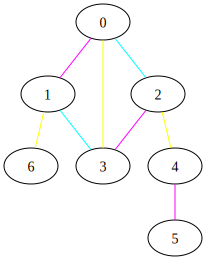

In [136]:
# test de la fonction affichage_couleurs_aretes_graphviz
coloration = coloration_aretes_welsh_powell(graphe2)
affichage_couleurs_aretes_graphviz(graphe2,coloration)


## Résolution de problèmes de plannings à l'aide de la coloration de graphes

### Fonctions intermédiaires, à compléter (vous pouvez en définir de nouvelles)

#### Affichage du planning donné par le dictionnaire `dico_planning`
Les clés du dictionnaire correspondent aux noms des créneaux et les valeurs aux événements ayant lieu durant chaque créneau.

In [137]:
def affichage_planning(dico_planning:int):
    #à completer
    return

In [138]:
# test de la fonction affichage_planning

### Fonctions principales, pour la création de plannings à l'aide de la coloration de graphes

#### Fonction qui crée un planning de rattrapage des examens, à partir du graphe `graphe`, définissant les incompatibilités entre les examens (c'est-à-dire les examens ne pouvant pas avoir lieu en même temps)
`noms_sommets` correspond aux noms des sommets (c'est-à-dire des examens) et `noms_couleurs` correspond aux noms des couleurs (c'est-à-dire le nom des créneaux horaires à considérer dans le planning), pour pouvoir donner le planning en fonction de ces informations (au lieu de conserver les numéros de sommets et les numéros des couleurs).

In [139]:
def creation_planning_rattrapages(graphe, noms_sommets, noms_couleurs):
    planning = {}
    cle=0
    repart_mat=coloration_sommets_welsh_powell(graphe)
    print(repart_mat)
    for color in repart_mat.keys():
        cle+=1
        planning[noms_couleurs[cle-1]]=[]
        for mat in repart_mat[color]:
                planning[noms_couleurs[cle-1]].append(noms_sommets[mat])
    return planning

In [140]:
# test de la fonction creation_planning_rattrapages et affichage du planning obtenu*
creation_planning_rattrapages(graphe_rattrapage,matiere_nom_rattrapage,creneaux_nom_rattrapage)

{'fuchsia': [0, 8, 6, 2], 'aqua': [1, 4, 7, 3], 'yellow': [5], 'blue': [], 'red': [], 'lime': [], 'cyan': [], 'grey': [], 'darkorange': [], 'burlywood': [], 'purple': [], 'darkgreen': []}


{'lundi matin': ['Cor ', 'SSLM', 'RL  ', 'AAL '],
 'lundi après-midi': ['DLIL', 'FT  ', 'TA  ', 'AAC '],
 'mardi matin': ['RSL '],
 'mardi après-midi': [],
 'mercredi matin': [],
 'mercredi après-midi': [],
 'jeudi matin': [],
 'jeudi après-midi': [],
 'vendredi matin': [],
 'vendredi après-midi': [],
 'samedi matin': [],
 'samedi après-midi': []}

#### Fonction qui crée un planning de *job dating*, à partir du graphe `graphe`, définissant les liens entre les étudiants et les entreprises choisies par eux
`noms_sommets` correspond aux noms des  (c'est-à-dire des étudiants et des entreprises) et `noms_couleurs` correspond aux noms des couleurs (c'est-à-dire le nom des créneaux horaires à considérer dans le planning), pour pouvoir donner le planning en fonction de ces informations (au lieu de conserver les numéros de sommets et les numéros des couleurs).

In [141]:
def creation_planning_job_dating(graphe, noms_sommets, noms_couleurs):
    planning = {}
    return planning

In [142]:
# test de la fonction creation_planning_job_dating et affichage du planning obtenu

#### Fonction qui crée un planning des matchs de badminton d'une journée de championnat, à partir du graphe `graphe`, représentant les incompatibilités entre les matchs (c'est-à-dire les matchs qui ne peuvent pas être joués en même temps car ils comportent un joueur commun)
`noms_sommets` correspond aux noms des sommets (c'est-à-dire des matches) et `noms_couleurs` correspond aux noms des couleurs (c'est-à-dire le nom des créneaux horaires à considérer dans le planning), pour pouvoir donner le planning en fonction de ces informations (au lieu de conserver les numéros de sommets et les numéros des couleurs).

In [143]:
def creation_planning_badminton(graphe, noms_sommets, noms_couleurs):
    planning={}
    return planning

In [144]:
# test de la fonction creation_planning_badminton et affichage du planning obtenu

### Utilisation des fonctions précédentes pour résoudre les problèmes associés, à partir de graphes à construire
A remplir à partir des exemples donnés dans le sujet de SAE.

#### Organisation de rattrapages d'examens

In [145]:
creneaux_nom_rattrapage = ["lundi matin","lundi après-midi","mardi matin","mardi après-midi","mercredi matin","mercredi après-midi","jeudi matin","jeudi après-midi","vendredi matin","vendredi après-midi","samedi matin","samedi après-midi","dimanche matin","dimanche après-midi"]
matiere_nom_rattrapage = ["Cor","DLIL","AAL","AAC","FT","RSL","RL","TA","SSLM"]
table_rattrapage=[[1,0,1,0,0,0,1,0,1],[0,1,0,1,1,0,0,0,0],[0,1,0,1,1,0,0,1,0],[0,0,1,1,1,0,0,1,0],[0,0,0,1,0,1,1,0,0],[0,0,0,0,0,1,0,0,1]]

#création graphe avec que des 1 (toutes matieres compatibles entre elles)
graphe_rattrapage = graphe_vide(len(table_rattrapage[0]))
for i in range(len(graphe_rattrapage)):
       for j in range(len(graphe_rattrapage[i])):
              if i==j: #on exclus le cours lui même
                     graphe_rattrapage[i][j]=0
              else:
                     graphe_rattrapage[i][j]=1
#
#gestion des cours impossibles car au même créneaux
for etu_rattrapage in table_rattrapage:
       for matiere_rattrapage in range(len(etu_rattrapage)): #on regarde les matière pour une ligne
              if etu_rattrapage[matiere_rattrapage]==1:
                     liste_matiere_incompatible=[]
                     for matiere_rattrapage_autre in range(len(etu_rattrapage)): #on regarde ou ya des 1 sur la même ligne (et si c'est pas lui même)
                            if matiere_rattrapage_autre!=matiere_rattrapage: #si c'est pas lui même
                                   if etu_rattrapage[matiere_rattrapage_autre]==1: #si il y a un 1, alors elle ne sont pas compatible
                                        liste_matiere_incompatible.append(matiere_rattrapage_autre)
                                        graphe_rattrapage[matiere_rattrapage][matiere_rattrapage_autre]=0
                                        graphe_rattrapage[matiere_rattrapage_autre][matiere_rattrapage]=0
#
print("============================ matière compatible ============================")
#alignement 
for i in range(len(matiere_nom_rattrapage)):
       if len(matiere_nom_rattrapage[i])<4:
            for _ in range(len(matiere_nom_rattrapage[i]),4):
              matiere_nom_rattrapage[i]+=" "
#
#affichage compatibilité matières
for i in range(len(graphe_rattrapage)):
       ligne=[]
       for j in range(len(graphe_rattrapage[i])):
              if graphe_rattrapage[i][j]==1:
                    ligne.append(matiere_nom_rattrapage[j])
              else:
                    ligne.append("----")
       print(matiere_nom_rattrapage[i],ligne)
#




============================ matière compatible ============================
Cor  ['----', 'DLIL', '----', 'AAC ', 'FT  ', 'RSL ', '----', 'TA  ', '----']
DLIL ['Cor ', '----', 'AAL ', '----', '----', 'RSL ', 'RL  ', '----', 'SSLM']
AAL  ['----', 'DLIL', '----', '----', '----', 'RSL ', '----', '----', '----']
AAC  ['Cor ', '----', '----', '----', '----', '----', '----', '----', 'SSLM']
FT   ['Cor ', '----', '----', '----', '----', 'RSL ', 'RL  ', '----', 'SSLM']
RSL  ['Cor ', 'DLIL', 'AAL ', '----', 'FT  ', '----', '----', 'TA  ', '----']
RL   ['----', 'DLIL', '----', '----', 'FT  ', '----', '----', 'TA  ', '----']
TA   ['Cor ', '----', '----', '----', '----', 'RSL ', 'RL  ', '----', 'SSLM']
SSLM ['----', 'DLIL', '----', 'AAC ', 'FT  ', '----', '----', 'TA  ', '----']


#### Organisation de sessions de *job meeting*

In [146]:
creneaux_nom_entreprises = []
etudiant_nom_entreprises = []
entreprise_nom_entreprises = []
table_etudiant=[[1,0,1,0,0,0,1,0,1],[0,1,0,1,1,0,0,1,0],[0,1,0,1,1,0,0,1,0],[0,0,1,1,1,0,0,1,0],[0,0,0,1,0,1,1,0,0],[1,0,0,0,0,1,0,0,1],[1,0,1,0,0,0,0,0,0],[0,1,0,1,0,1,0,0,1],[1,0,0,0,1,0,0,0,0],[0,1,0,1,0,1,1,0,0],[1,0,1,0,0,1,0,0,0],[0,1,0,0,1,0,1,0,1]]
#réalisation automatique des creneaux (12h-18h)
for i in range(6):
      for j in range(3):
             if j==0:
                   creneaux_nom_entreprises.append(str(12+i)+"h00")
             else:
                   creneaux_nom_entreprises.append(str(12+i)+"h"+str(j*20))
#

#réalisation automatique des nom d'etudiants
for i in range(1,len(table_etudiant)+1):
      etudiant_nom_entreprises.append("Etu"+str(i))

#réalisation automatique des nom d'entreprise
for i in range(1,len(table_etudiant[0])+1):
      entreprise_nom_entreprises.append("Entp"+str(i))

########################################création planning mais sans graphe et sans coloration car plus efficace

creneaux_entreprise_dispo={}
planning_etudiant={}
planning_entreprise={}
#initialisation
for entreprise in entreprise_nom_entreprises:
      creneaux_entreprise_dispo[entreprise]=creneaux_nom_entreprises.copy()
      planning_entreprise[entreprise]=[]

#association avec étudiant
for etudiant_meeting in range(len(table_etudiant)):
      planning_etudiant[etudiant_nom_entreprises[etudiant_meeting]]=[]
      for dating in range(len(table_etudiant[etudiant_meeting])):
            if table_etudiant[etudiant_meeting][dating]==1:
                  #regarde quel créneau de l'entreprise est dispo
                  for creneau in creneaux_entreprise_dispo[entreprise_nom_entreprises[dating]]: #on ajoute le premier créneau dispo
                        planning_etudiant[etudiant_nom_entreprises[etudiant_meeting]].append(creneau)
                        creneaux_entreprise_dispo[entreprise_nom_entreprises[dating]].remove(creneau)
                        planning_entreprise[entreprise_nom_entreprises[dating]].append(creneau)
                        break
            else:
                  planning_etudiant[etudiant_nom_entreprises[etudiant_meeting]].append("aucun")

#dico final
planning_final={}
for planning_etu in planning_etudiant:
      dict={}
      #preparation data
      for creneau in range(len(planning_etudiant[planning_etu])):
            dict[planning_etudiant[planning_etu][creneau]]=[]
      #insertion data
      for creneau in range(len(planning_etudiant[planning_etu])):
            dict[planning_etudiant[planning_etu][creneau]].append(entreprise_nom_entreprises[creneau])
      planning_final[planning_etu]=dict

print("===========================planning final=======================")
for i in planning_final:
      print(i,planning_final[i])

===========================planning final=======================
Etu1 {'12h00': ['Entp1', 'Entp3', 'Entp7', 'Entp9'], 'aucun': ['Entp2', 'Entp4', 'Entp5', 'Entp6', 'Entp8']}
Etu2 {'aucun': ['Entp1', 'Entp3', 'Entp6', 'Entp7', 'Entp9'], '12h00': ['Entp2', 'Entp4', 'Entp5', 'Entp8']}
Etu3 {'aucun': ['Entp1', 'Entp3', 'Entp6', 'Entp7', 'Entp9'], '12h20': ['Entp2', 'Entp4', 'Entp5', 'Entp8']}
Etu4 {'aucun': ['Entp1', 'Entp2', 'Entp6', 'Entp7', 'Entp9'], '12h20': ['Entp3'], '12h40': ['Entp4', 'Entp5', 'Entp8']}
Etu5 {'aucun': ['Entp1', 'Entp2', 'Entp3', 'Entp5', 'Entp8', 'Entp9'], '13h00': ['Entp4'], '12h00': ['Entp6'], '12h20': ['Entp7']}
Etu6 {'12h20': ['Entp1', 'Entp6', 'Entp9'], 'aucun': ['Entp2', 'Entp3', 'Entp4', 'Entp5', 'Entp7', 'Entp8']}
Etu7 {'12h40': ['Entp1', 'Entp3'], 'aucun': ['Entp2', 'Entp4', 'Entp5', 'Entp6', 'Entp7', 'Entp8', 'Entp9']}
Etu8 {'aucun': ['Entp1', 'Entp3', 'Entp5', 'Entp7', 'Entp8'], '12h40': ['Entp2', 'Entp6', 'Entp9'], '13h20': ['Entp4']}
Etu9 {'13h00': ['En

#### Planification des matchs d'une rencontre de championnat de badminton

In [147]:
match=["SH1","SH2","SD1","SD2","DH","DD","Mx1","Mx2"]
match_joueurs_badminton=[[1,0,0,0,0,0,0,0],[0,1,0,0,1,0,0,0],[0,0,1,0,0,1,0,0],[0,0,0,1,0,1,0,0],
                         [0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,1],
                         [0,0,0,0,0,0,0,1],[1,0,0,0,1,0,0,0],[0,1,0,0,0,0,1,0],[0,0,1,0,0,1,0,0],
                         [0,0,0,1,0,0,1,0],[0,0,0,0,1,0,0,1],[0,0,0,0,0,1,0,1]]
joueurs=["JB","JF","SP","AC","AT","JM","SQ","AL","HL","ML","OL","DT","CT","ET","IC"]
terrain={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],"6":[],"7":[]}
blacklist=[] #va servir a stocker les rencontre qui ne peuvent pas se produire car un joueur est déja solicité
joue_en_parallele=[]


def peut_jouer_parallele(match_joueurs): # on crée une fonction car on va l'utilisé plusieur fois
    for i in range(len(match_joueurs)):
        for j in range(len(match_joueurs[i])):
            if match_joueurs[i][j]== 1 and j not in blacklist: #si la rencontre n'est pas bannies
                for t in terrain:
                    if joueurs[i] in terrain[t]: #vérifie que le joueur n'est pas déja dans un terrain
                        if j not in blacklist : #si le joueur est deja dans un terrain on ajoute l'id de la rencontre dans une liste des rencontre bannies pour a terme l'empecher de se produire (meme si d'autre membre peuvent y participer)
                            blacklist.append(j)
                        break
                if joueurs[i] not in terrain[t]:
                    terrain[str(j)].append(joueurs[i])
            if j in blacklist: # supprime tout les joueurs sur le terrain si l'id de la rencontre est dans la liste des rencontre bannies
                terrain[str(j)]=[]
    #print(terrain)

########################################création planning mais sans graphe et sans coloration car plus efficace

peut_jouer_parallele(match_joueurs_badminton)

parrallele=[]
for i in terrain:
    if terrain[i] != []:
        parrallele.append(match[int(i)])

joue_en_parallele.append(parrallele) #on a pour la première fois les rencontre qui peuvent se passer en meme temps

while blacklist != []: #la fonction peut_jouer_parallele se lancera tant que il y aura des matchs dans "blacklist" qui n'auront donc pas été joué
    for i in range(len(match_joueurs_badminton)):
        for j in range(len(match_joueurs_badminton[i])):
            if j not in blacklist: #si la rencontre n'avais pas été bannies
                match_joueurs_badminton[i][j]=0 #on supprime les rencontre qui on déja eu lieu dans l'agendas des joueurs
    blacklist=[]
    terrain={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],"6":[],"7":[]} #il faut réinitialisé les terrains
    peut_jouer_parallele(match_joueurs_badminton) #on peut maintenant relancer la fonction pour voir quel match parmis les bannis du tour précedent peuvent etre joués en meme temps
    parrallele=[]
    for i in terrain:
        if terrain[i] != []:
            parrallele.append(match[int(i)])
    
joue_en_parallele.append(parrallele)

print("Les groupes de matchs qui peuvent etre joué en meme temps sont :",joue_en_parallele)

Les groupes de matchs qui peuvent etre joué en meme temps sont : [['SH1', 'SH2', 'SD1', 'SD2', 'Mx2'], ['DH', 'DD', 'Mx1']]


#### Planification des matchs d'une rencontre supplémentaire de championnat de badminton

Journée de championnat choisie : <donnez le numéro de la journée et les 2 équipes concernées ainsi que le lien vers la page de la ffbd>

In [149]:
# Inputs
num_journee=0
equipe1=""
equipe2=""
ffbd=""
ok = False
while not ok:
    try:
        num_journee=int(input("donnez le numéro de la journée: "))
        ok=True
    except:
        ok=False
ok = False
while not ok:
    try:
        equipe1=str(input("donnez la première équipe concerné: "))
        ok=True
    except:
        print("il faut donner un String")
        ok=False
ok = False
while not ok:
    try:
        equipe2=str(input("donnez la deuxième équipe concerné: "))
        ok=True
    except:
        print("il faut donner un String")
        ok=False
ok = False
while not ok:
    try:
        ffbd=str(input("donnez le lien de la page ffbd"))
        ok=True
    except:
        print("il faut donner un String")
        ok=False
#truc à faire
print(ffbd+"/quelquechose_à_mettre_ici")
print("journée",num_journee,":",equipe1,"VS",equipe2)

https://google.com/quelquechose_à_mettre_ici
journée 1 : 1 VS 2
